In [12]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [13]:
# Load Data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
# Understand Data
print("X_train shape:", X_train.shape)   # (60000, 28, 28)
print("y_train shape:", y_train.shape)   # (60000,)
print("X_test shape: ", X_test.shape)    # (10000, 28, 28)
print("y_test shape: ", y_test.shape)    # (10000,)
print("Pixel range:", X_train.min(), "–", X_train.max())  # 0 – 255

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)
Pixel range: 0 – 255


In [15]:
X_test[0].shape

(28, 28)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

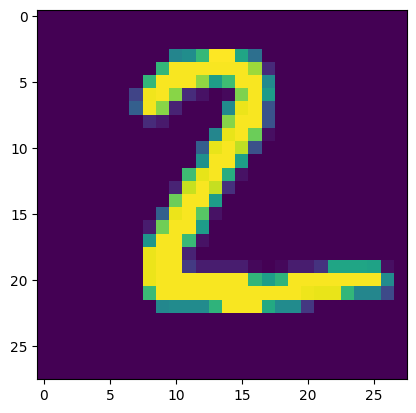

In [17]:
plt.imshow(X_test[1])

In [18]:
# Normlization
X_train = X_train/255
X_test = X_test/255

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1269 - val_accuracy: 0.9757
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 0.1399 - val_accuracy: 0.9755
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.1241 - val_accuracy: 0.9783
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1468 - val_accuracy: 0.9748
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.1293 - val_accuracy: 0.9781
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.1598 - val_accuracy: 0.9732
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.1480 - val_accuracy:

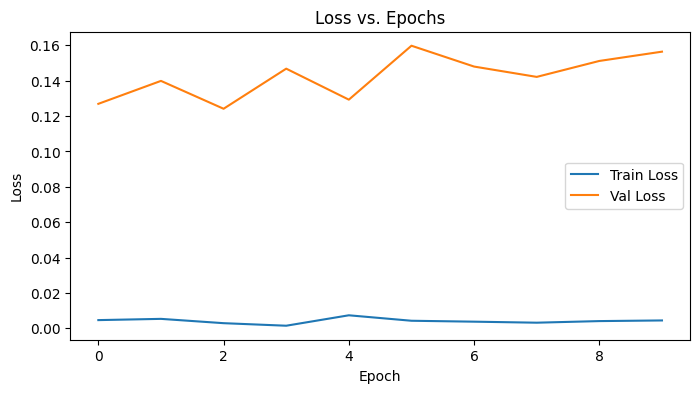

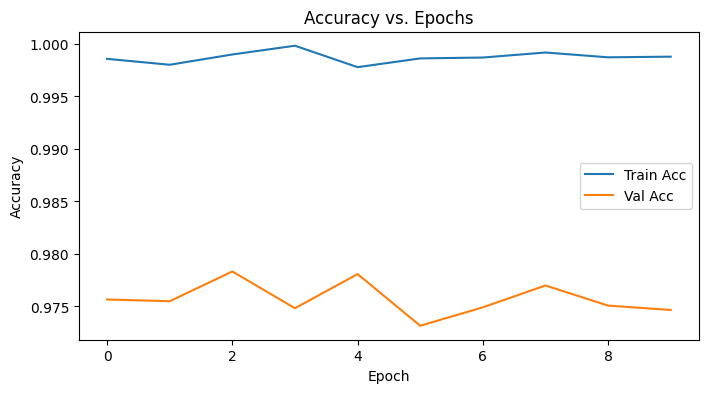

In [29]:
# ‘history’ was returned by model.fit(...)
import matplotlib.pyplot as plt

# 1) Plot training & validation loss over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 2) Plot training & validation accuracy over epochs
plt.figure(figsize=(8, 4))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [31]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [33]:
y_pred = y_prob.argmax(axis=1)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9757